In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.cort_processor import *
from src.plotter import *
from src.filters import *
import math
import pickle
import pandas as pd
from sklearn.utils import shuffle
import scipy
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import cm
from scipy import signal
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from matplotlib import colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import tdt 
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, iirnotch, filtfilt, resample, hilbert, welch
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
from scipy.io import savemat
from scipy.fft import fftshift

In [2]:
rollie1216 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/teq/0210')
rollie1216.process()

read from t=0s to t=345.41s
read from t=0s to t=360.07s


(array([[ 60.,  20.,  60., ...,  40.,  80.,  60.],
        [ 60., 120., 120., ...,  80.,  20., 120.],
        [ 40., 140.,  80., ...,  20.,   0., 120.],
        ...,
        [ 60., 120.,  20., ...,  20.,   0.,  40.],
        [  0.,  60.,  60., ...,   0.,   0.,  20.],
        [ 40.,   0.,  60., ...,   0.,  60.,  40.]]),
 array([[165.04212637,  62.05968537,  68.01284291, ...,  88.44347268,
          77.77221799, 125.00880864],
        [160.80700108,  76.4108133 ,  68.46222572, ..., 115.92204272,
          68.26463126,  97.59397445],
        [165.82847801,  90.56513028,  68.26985874, ..., 113.70652281,
          71.22853429,  98.90918859],
        ...,
        [161.89538783,  58.82980113,  63.46532531, ...,  56.20058932,
          90.54743637, 170.73173551],
        [157.370791  ,  53.93712258,  65.16367026, ...,  54.73827367,
          87.52572024, 171.54052801],
        [151.05325149,  48.35280331,  65.28979724, ...,  55.52980295,
          77.94177814, 150.82884125]]))

In [3]:
h_angle16, vaf_array16, final_test_x16, final_test_y16 = rollie1216.decode_angles()

In [4]:
print(vaf_array16)

[0.269 0.524 0.087 0.45  0.269 0.373 0.288 0.446]


In [93]:
rates_sf, _ = rollie1216.stitch_and_format()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
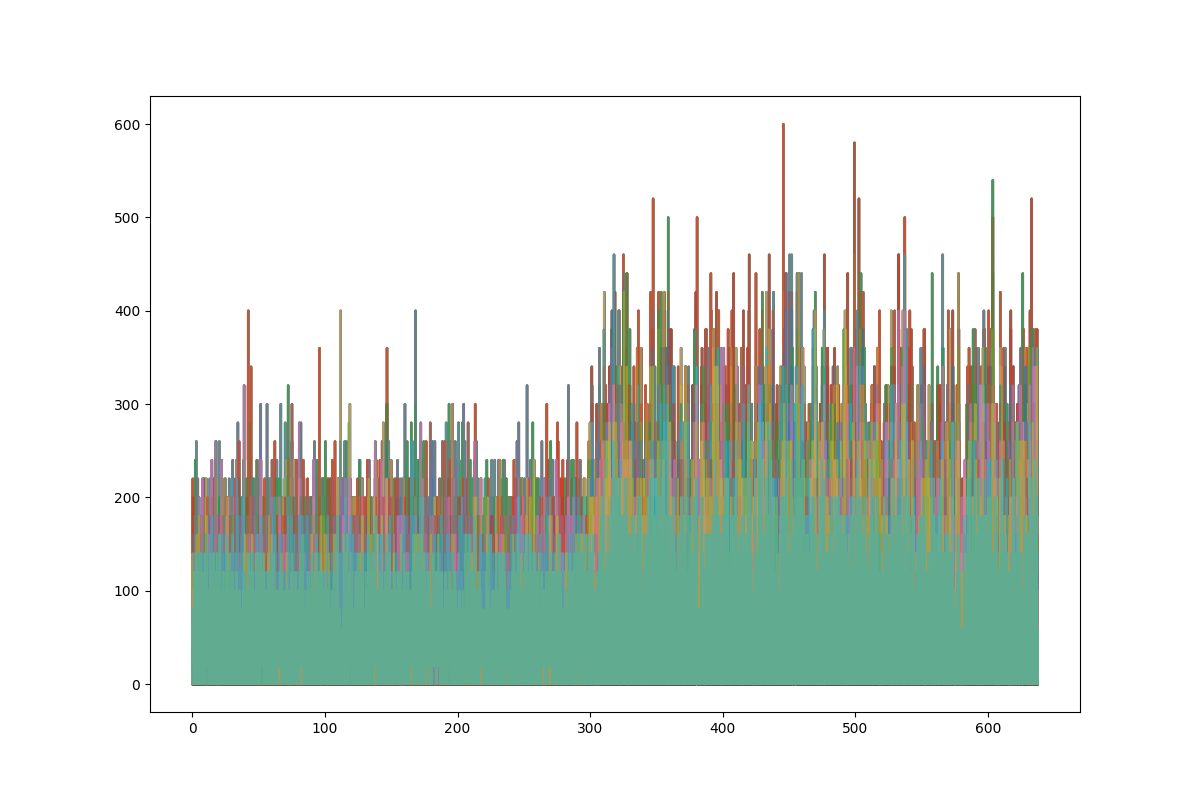

In [114]:
tsf = np.linspace(0, (rates_sf.shape[0]*50)/1000,rates_sf.shape[0])
fig512, ax= plt.subplots(1, 1, figsize=(12,8), sharex = True)
for i in range(rates_sf.shape[1]):
    ax.plot(tsf, rates_sf[:,i], alpha = 0.5)


In [34]:
rates_raw = rollie1216.data['rates']


In [35]:
rate_slice0 = rates_raw[0][:,1]
rate_slice1 = rates_raw[1][:,1]

In [36]:
print(rate_slice1.shape)


(6784,)


In [89]:
mu_i = np.mean(rate_slice1)
stdv_i = np.std(rate_slice1)
mu_0 = np.mean(rate_slice0)
stdv_0 = np.std(rate_slice0)
resamples = []
for k in range(rate_slice1.shape[0]):
    z = (rate_slice1[k] - mu_i) / stdv_i
    re = (z*stdv_0) + mu_0
    resamples.append(re)
minimum = np.min(resamples)
for l in range(len(resamples)):
    resamples[l] = resamples[l] - minimum
resamples = np.array(resamples)    

In [90]:
np.min(resamples)

0.0

In [91]:
unmodified = np.hstack([rate_slice0,rate_slice1])
resampled_rates = np.hstack([rate_slice0,resamples])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
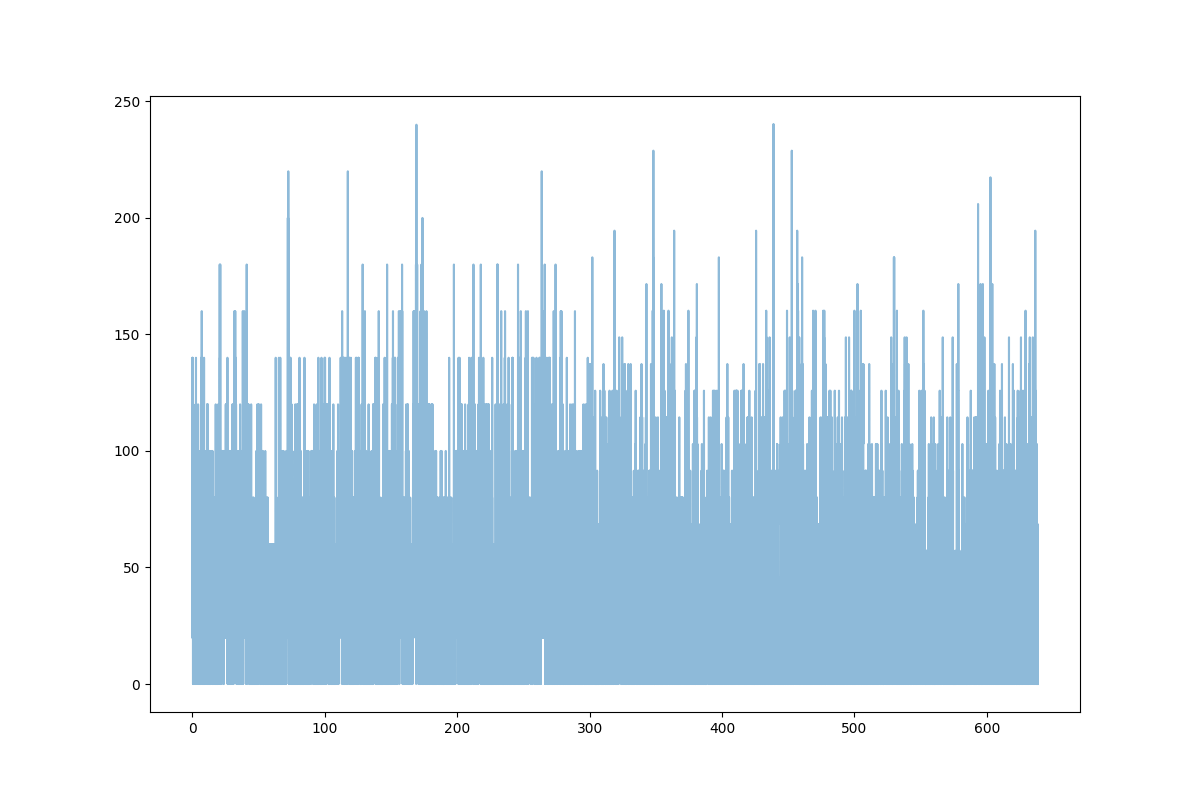

In [92]:

tst = np.linspace(0, (unmodified.shape[0]*50)/1000,unmodified.shape[0])
fig512, ax= plt.subplots(1, 1, figsize=(12,8), sharex = True)
# ax.plot(tst, unmodified, alpha = 0.5)
ax.plot(tst, resampled_rates, alpha = 0.5)


In [109]:
rates = rollie1216.data['rates']

for i in range(len(rates)):
    if i > 0:
        rescaled_rates = []
        for j in range(rates[i].shape[1]):
            rescaled_channel = []
            mu_i = np.mean(rates[i][:,j])
            stdv_i = np.std(rates[i][:,j])
            mu_0 = np.mean(rates[0][:,j])
            stdv_0 = np.std(rates[0][:,j])
            for k in range(rates[i][:,j].shape[0]):
                z = (rates[i][k,j] - mu_i) / stdv_i
                re = (z*stdv_0) + mu_0
                re = round(re/10)*10
                rescaled_channel.append(re)
            minimum = np.min(rescaled_channel)
            print(minimum)
            for l in range(len(rescaled_channel)):
                rescaled_channel[l] = rescaled_channel[l] - minimum
            rescaled_channel = np.array(rescaled_channel)
            rescaled_rates.append(rescaled_channel)
        rescaled_rates = np.array(rescaled_rates).T

10
10
10
10
40
-10
20
0
10
0
0
10
0
20
0
20
-10
10
-10
30
0
20
0
20
30
0
20
0
10
10
0
20


In [110]:
print(rescaled_rates)
print(rates[1])

[[ 0 20 20 ... 50 30 20]
 [10 30 20 ... 60 50 10]
 [ 0  0  0 ... 20  0  0]
 ...
 [40 70 20 ... 20  0 20]
 [ 0 30 50 ...  0  0 10]
 [30  0 50 ...  0 40 20]]
[[  0.  40.  20. ...  60.  40.  40.]
 [ 20.  60.  20. ...  80.  80.  20.]
 [  0.   0.   0. ...  20.   0.   0.]
 ...
 [ 60. 120.  20. ...  20.   0.  40.]
 [  0.  60.  60. ...   0.   0.  20.]
 [ 40.   0.  60. ...   0.  60.  40.]]


In [111]:
new_rate_list = [rates[0], rescaled_rates]
print(new_rate_list)

[array([[ 60.,  20.,  60., ...,  40.,  80.,  60.],
       [ 60., 120., 120., ...,  80.,  20., 120.],
       [ 40., 140.,  80., ...,  20.,   0., 120.],
       ...,
       [ 40., 100., 140., ..., 120.,  80.,  80.],
       [ 60.,  60.,  80., ...,  20.,  60.,  40.],
       [ 40.,  40.,   0., ...,   0.,   0.,  20.]]), array([[ 0, 20, 20, ..., 50, 30, 20],
       [10, 30, 20, ..., 60, 50, 10],
       [ 0,  0,  0, ..., 20,  0,  0],
       ...,
       [40, 70, 20, ..., 20,  0, 20],
       [ 0, 30, 50, ...,  0,  0, 10],
       [30,  0, 50, ...,  0, 40, 20]])]


In [112]:
_, res_vaf_array, _, _ = rollie1216.decode_angles(X=new_rate_list)

In [113]:
print(res_vaf_array)

[0.262 0.506 0.065 0.435 0.263 0.374 0.282 0.439]


In [ ]:
[0.27  0.528 0.077 0.449 0.274 0.382 0.291 0.453]

In [ ]:
mu_i = np.mean(rate_slice1)
stdv_i = np.std(rate_slice1)
mu_0 = np.mean(rate_slice0)
stdv_0 = np.std(rate_slice0)
resamples = []
for k in range(rate_slice1.shape[0]):
    z = (rate_slice1[k] - mu_i) / stdv_i
    re = (z*stdv_0) + mu_0
    resamples.append(re)
minimum = np.min(resamples)
for l in range(len(resamples)):
    resamples[l] = resamples[l] - minimum
resamples = np.array(resamples)    

In [119]:
rates_fs, _ = rollie1216.stitch_and_format(new_rate_list, rollie1216.data['angles'])
print(rates_fs.shape)

(12750, 320)


In [117]:
rates_sf.shape

(12750, 320)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
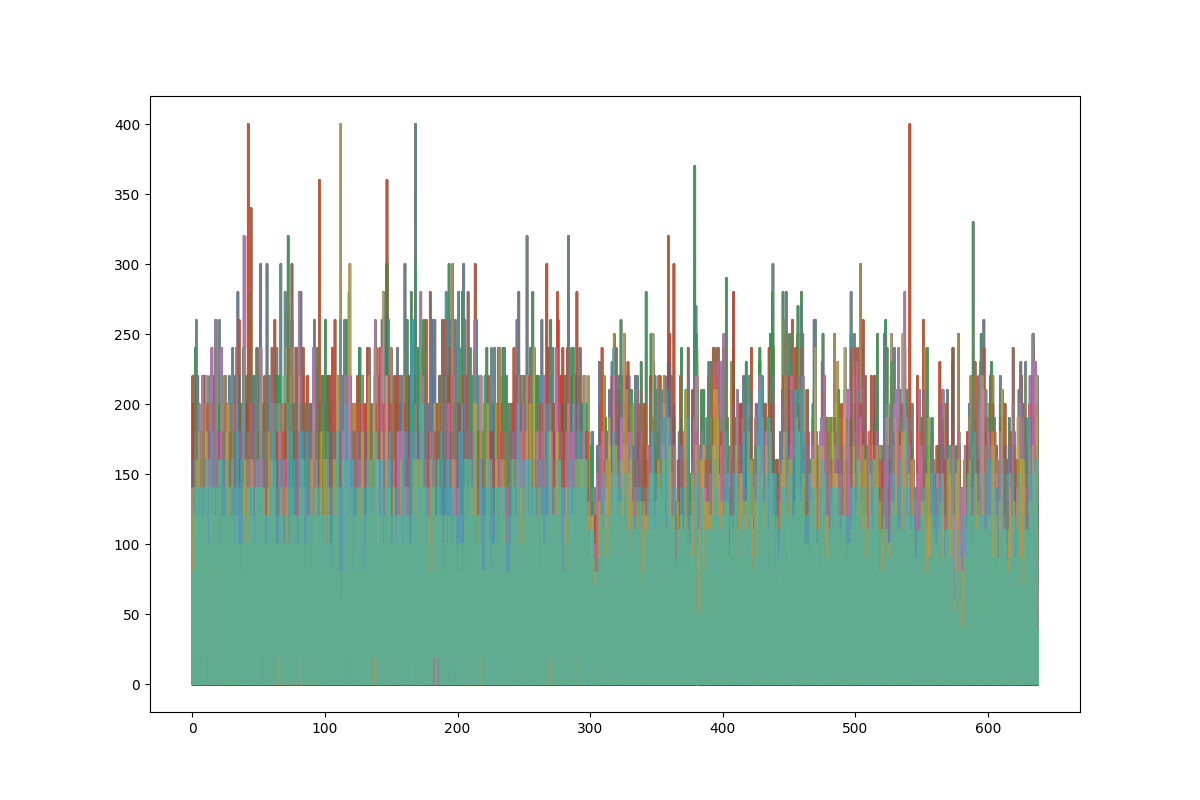

In [120]:
tsf = np.linspace(0, (rates_sf.shape[0]*50)/1000,rates_sf.shape[0])
fig512, ax= plt.subplots(1, 1, figsize=(12,8), sharex = True)
for i in range(rates_sf.shape[1]):
    ax.plot(tsf, rates_fs[:,i], alpha = 0.5)